In [2]:
import cv2
import matplotlib.pyplot as plt
config_file='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model='frozen_inference_graph.pb'
model=cv2.dnn_DetectionModel(frozen_model,config_file)
classlabels=[]
file_name='label.txt'
with open(file_name,'rt') as fpt:
    classlabels=fpt.read().rstrip('\n').split('\n')
print(classlabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [3]:
print(len(classlabels))

80


In [6]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 00000274143AA6D0>

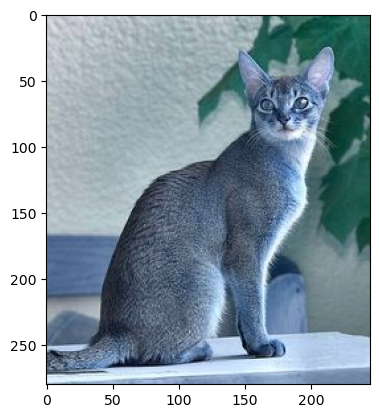

In [4]:
#read an image
img=cv2.imread('img.jpg')
plt.imshow(img)

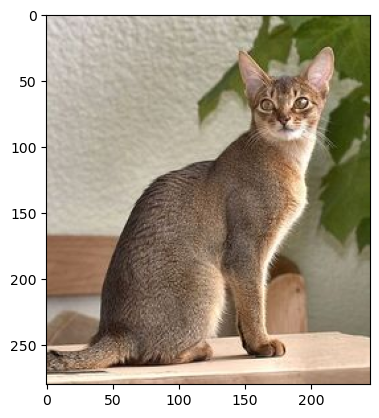

In [5]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [7]:
ClassIndex,confidence,bbox=model.detect(img,confThreshold=0.5)
print(ClassIndex)

[17]


In [8]:
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classlabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)

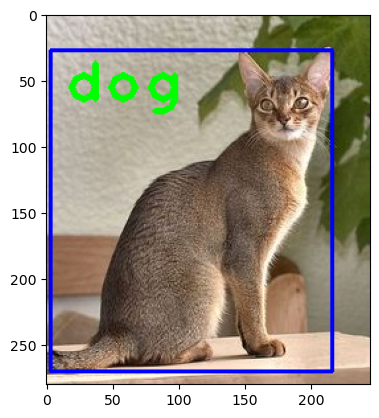

In [9]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [12]:
cap=cv2.VideoCapture('traffic.mp4')
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('Cannot open video')
    
font_scale=1
font=cv2.FONT_HERSHEY_PLAIN
while True:
    ret,frame=cap.read()
    ClassIndex,confidence,bbox=model.detect(frame,confThreshold=0.55)
    print(ClassIndex)
    if(len(ClassIndex)!=0):
        for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
            if (ClassInd<=80):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(frame,classlabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)
    cv2.imshow('object detection tutorial',frame)
    if cv2.waitKey(2) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

[3 3 3]
[3 3 3 3]
[3 6 3 3 3]
[3 3 6 6]
[3 3 6 8 6]
[3 6 3 8]
[3 6 3 6 6 8]
[3 6 3 6 6 3 8]
[3 6 3 6 3]
[3 6 6 3 6]
[3 6 3 6 3]
[3 6 3 3 6]
[3 6 3 6 3]
[3 6 3 3 6]
[6 3 3 6 3]
[6 3 3 3 6 3]
[6 3 3 3]
[6 3 3 3 3]
[3 6 3 3 3]
[6 3 3 3 3]
[6 3 3 3 3]
[3 6 3 3 3]
[6 3 3 3 8]
[6 3 3 3 3 6]
[6 3 3 3 6]
[6 3 3 3 6]
[6 3 3 3 3]
[6 3 3 3 8 3]
[6 3 3 3 8 3]
[6 3 3 8 3 3 6]
[6 3 8 3 6 3]
[6 3 8 3 6 3]
[6 3 3 8 3 6 1 1]
[6 3 3 3 8 6 1 1]
[6 3 3 3 8 6 1 1]
[6 3 3 8 3]
[6 3 3 8 3]
[6 3 3 3 8]
[6 3 3 3 8]
[3 6 3 8 3 6]
[3 6 8 3 3]
[6 3 8 3 3]
[6 3 8 3]
[6 3 8 6 3]
[6 3 3 8]
[6 3 3 8 3]
[6 3 8 3]
[6 3 8 3 3 3]
[6 3 8 3 3 3]
[6 3 3 3 3 6 8 6 6]
[6 3 3 3 3 6 8]
[6 3 3 6 3 6 3]
[3 6 3 3 6 6 3]
[3 6 3 3 6]
[3 6 3 6]
[3 6 6]
[3 6 3 6]
[3 6 3 6]
[3 3 6 6]
[3 6 6 3]
[3 6 3 3]
[3 6 3 3]
[3 6 3 1 3]
[3 6 1 6 3]
[3 1 6 3 6]
[1 3 6 3]
[1 3 6]
[1 3 6]
[1 3 6]
[1 3 6]
[3 1 6]
[3 1 6]
[3 6 6]
[3 6 6]
[3 6 6]
[3 6 6 3]
[6 3 6 3]
[6 3 6 6 3]
[3 6 6 6 3]
[3 6 6 3 6 3]
[6 3 6 6 1 3 3]
[6 6 3 6 3 1 3 1]
[6 3 6 6 1 3]
[6